# Horoscope Bot

This program is a horoscope bot that receives a name, month and date from the user and produces a custom 5-line horoscope. It first determines the user's zodiac sign using the month and date given and then returns an image representing the zodiac sign and displays the user's daily horoscope. 

## Import Libraries

In [1]:
from IPython.core.display import HTML # to modify the location of images
import time # to create countdown
from messages import * # messages to create horoscopes
import random # to generate random choices
from PIL import Image               # imaging library
import matplotlib.pyplot as plt # to create visualiztions in python
from matplotlib.pyplot import imshow # to display images using matplotlib
# displays images inline
%matplotlib inline 

print('All Libraries Imported')

All Libraries Imported


## Center Images

The following code modifies the CSS of this notebook so that any images created will be centered on the console instead of left justified. 

In [2]:
#this code centers images on the screen
# code sourced from https://www.science-emergence.com/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## List of Functions

This is a list of functions created to run in main().

1. print_intro()
2. get_dob()
3. get_sign()
4. zodiac_countdown()
5. get_img()
6. get_horoscope()
7. print_outro()

## Main Function

The main function includes all of the above helper functions and is what makes the program run. Run this code to use the horoscope bot. 

Oh, hello there! What's your name? Naomi
Nice to meet you, Naomi. Enter your birthday to get your horoscope: 
Enter your birth month: februry
Please enter a valid month.
Enter your birth month: february
Enter your birth date: 31
Please enter a valid day.
Enter your birth date: 29
                                             Your sign is... 3... 2... 1...


                                               ❤❤❤    Pisces!     ❤❤❤                                                


                                                   Lucky you, Naomi!                                                    

Here's today's Horoscope:

Communication is going to be a bit strained today -- don't take things personally. Empty a few closets today -- the 'emotional' and 'linen' kinds. Get a fresh start, Naomi. The worst thing you can do today is let yourself get intimidated by expectations! Your romance skills may not be the best, but that shouldn't stop you from flirting. Fight the seduction of passivity 

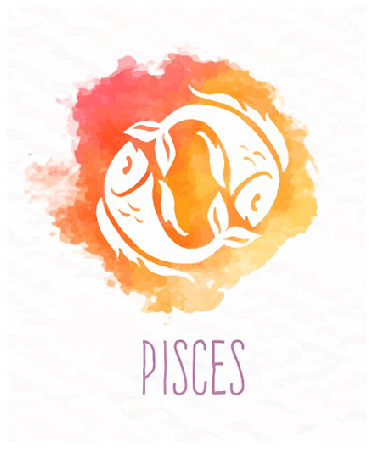

In [3]:
"""
Zodiac images came from: https://www.freepik.com/free-photos-vectors/background

All horoscopes are collected from: https://www.astrology.com/horoscope/daily-quickie
"""


def main():
    """
    This function takes user input to determine zodiac sign and creates a customized horoscope with image for the user.
    Inputs: Receives name(string), month(string) and day(integer) as  user input.
    Returns: Returns randomly generated 5-line horoscope and image of zodiac symbol.
    Doctests: none
    """

    #body of main function
    name = print_intro()
    month, day = get_dob()
    sign = get_sign(month, day, name)
    zodiac_countdown(sign, name)
    get_img(sign)
    get_horoscope(sign, name)
    print_outro(name)


def print_intro():
    """
    This function greets user and asks their name to use throughout program.
    Inputs: receives name as user input.
    Returns: returns name to be used in othe functions.
    Doctests: none
    """

    # converts user name to string with capital first letter. strips white space.
    name = str(input("Oh, hello there! What's your name? ")).title()
    name = name.strip()
    time.sleep(1)
    # prints greeting. returns name as output.
    print('Nice to meet you, ' + name + '. ' + 'Enter your birthday to get your horoscope: ')
    return name


def get_dob():
    """
    This function gets user date of birth and checks conditions to validate user input.
    Inputs: receives month and day as user input.
    Returns: month and day to be used in other functions
    Doctests: none
    """
    #converts month to lower case and strips white space.
    month = input('Enter your birth month: ')
    month = month.lower()
    month = month.strip()

    #dictionary of months with numerical representation as key.
    months = {'january': 1, 'february': 2, 'march': 3, 'april': 4,
              'may': 5, 'june': 6, 'july': 7, 'august': 8,
              'september': 9, 'october': 10, 'november': 11, 'december': 12}

    key = list(months.keys())
    # value = list(months.values()) for future work.

    #determines if input is a valid month and asks user to enter correct input.
    if month not in key:
        print('Please enter a valid month.')
        month = input('Enter your birth month: ').lower()
        month = month.strip()
    if month == "":
        print('Please enter a valid month.')
        month = input('Enter your birth month: ').lower()
        month = month.strip()

    time.sleep(1)
    # days are 1-31. casts input as integer.
    days = list(range(1, 32))
    day = int(input('Enter your birth date: '))

    # validates input for day. February has 29 days. April, June, Septmeber, Novemeber have 30.
    if month == 'february' and day > 29:
        #if day > 29:
        print('Please enter a valid day.')
        day = int(input('Enter your birth date: '))

    if  month == 'april' or month == 'june' or month == 'september' or month == 'november':
        if day > 30:
            print('Please enter a valid day.')
            day = int(input('Enter your birth date: '))

    # makes sure day is valid, between 1-31 and not blank.
    if day not in days:
        print('Please enter a valid day.')
        day = int(input('Enter your birth date: '))

    if day == "":
        print('Please enter a valid day.')
        day = int(input('Enter your birth date: '))
    return month, day


def get_sign(month, day, name):
    """
    This function uses month and day of birth to determine zodiac sign.
    Inputs: receives month and day from get_dob function
    Returns: returns zodiac sign to use in other functions
    Doctests: none
    """

    # assigns zodiac sign using month and zodiac cutoff dates
    if month == 'january':
        sign = 'capricorn' if (day < 20) else 'aquarius'
    elif month == 'february':
        sign = 'aquarius' if (day < 19) else 'pisces'
    elif month == 'march':
        sign = 'pisces' if (day < 21) else 'aries'
    elif month == 'april':
        sign = 'aries' if (day < 20) else 'taurus'
    elif month == 'may':
        sign = 'taurus' if (day < 21) else 'gemini'
    elif month == 'june':
        sign = 'gemini' if (day < 21) else 'cancer'
    elif month == 'july':
        sign = 'cancer' if (day < 23) else 'leo'
    elif month == 'august':
        sign = 'leo' if (day < 23) else 'virgo'
    elif month == 'september':
        sign = 'virgo' if (day < 23) else 'libra'
    elif month == 'october':
        sign = 'libra' if (day < 23) else 'scorpio'
    elif month == 'november':
        sign = 'scorpio' if (day < 22) else 'sagittarius'
    elif month == 'december':
        sign = 'sagittarius' if (day < 22) else 'capricorn'   
    return sign


def zodiac_countdown(sign, name):
    """
    This functions displays zodiac after 3,2,1 countdown
    Inputs: sign and name
    Outputs: none
    Doctests: none
    """
    #prints zodiac sign with countdown using time.sleep()
    print(('Your sign is...').rjust(60), end="")
    time.sleep(1)
    print(("3...").center(5), end="")
    time.sleep(1)
    print(("2...").center(5), end="")
    time.sleep(1)
    print(("1...").center(5))
    time.sleep(1)
    print('\n')
    print('❤❤❤{: ^16}❤❤❤'.center(108).format(str.title(sign) + '!'))
    print('\n')
    print(('Lucky you, ' + name + '!').center(120))
  
    
def get_img(sign):
    """
    This function displays a zodiac sign image using user's sign.
    Inputs: receives sign from get_sign
    Returns: returns image for corresponding zodiac sign
    Doctests: none
    """
    
    #images for each zodiac stored in variables
    aries = Image.open('images/aries.jpg')
    taurus = Image.open('images/taurus.jpg')
    gemini = Image.open('images/gemini.jpg')
    cancer = Image.open('images/cancer.jpg')
    leo = Image.open('images/leo.jpg')
    virgo = Image.open('images/virgo.jpg')
    libra = Image.open('images/libra.jpg')
    scorpio = Image.open('images/scorpio.jpg')
    sagittarius = Image.open('images/sagittarius.jpg')
    capricorn = Image.open('images/capricorn.jpg')
    aquarius = Image.open('images/aquarius.jpg')
    pisces = Image.open('images/pisces.jpg')

    #dictionary with sign as key and image variable as value.
    images = {'aries': aries, 'taurus': taurus, 'gemini': gemini, 'cancer': cancer, 'leo': leo,
              'virgo': virgo, 'libra': libra, 'scorpio': scorpio, 'sagittarius': sagittarius,
              'capricorn': capricorn, 'aquarius': aquarius, 'pisces': pisces}
    
    for key in images:
        if sign == key:
            plt.rcParams['figure.figsize'] = [10, 8]
            #plt.title('❤❤❤{: ^16}❤❤❤\n'.format(str.title(sign)), fontsize = 24)
            plt.axis('off')
            image = plt.imshow(images[key])
    return image
    
    
def get_horoscope(sign, name):
    """"
    This function creates a custom 5-line horoscope for user.
    Inputs: receives name from print_intro and sign from get_sign and messages from messages.py
    Returns: returns horoscope for use in future functions # future work
    Doctests: none
    """

    #variables are sentences for horoscope stored in messages.py. each variable chooses one sentence randomly.
    one = random.choice(first)
    two = random.choice(second)
    three = random.choice(third)
    four = random.choice(fourth)
    five = random.choice(fifth)

    #creates variable using 5 sentences, user name and sign.
    horoscope = one + ' ' + two + ', ' + name + '. ' + three + ' ' + four + ' ' + five + ', Dear, ' + str.title(sign) + '.'

    time.sleep(2)
    print("\nHere's today's Horoscope:\n\n" + horoscope)
    return horoscope


def print_outro(name):
    """
    This function prints a closing message to user.
    Inputs: receives name from print_intro function
    Returns: prints salutation to user
    Doctests: none
    """

    #closing message to user welcoming them back the next day.
    time.sleep(1)
    print(' ')
    print('Hope you feel inspired. ' + 'Carpe Diem, ' + name + '! ' + 'See you tomorrow.')


if __name__ == '__main__':
    main()